
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0.0,
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

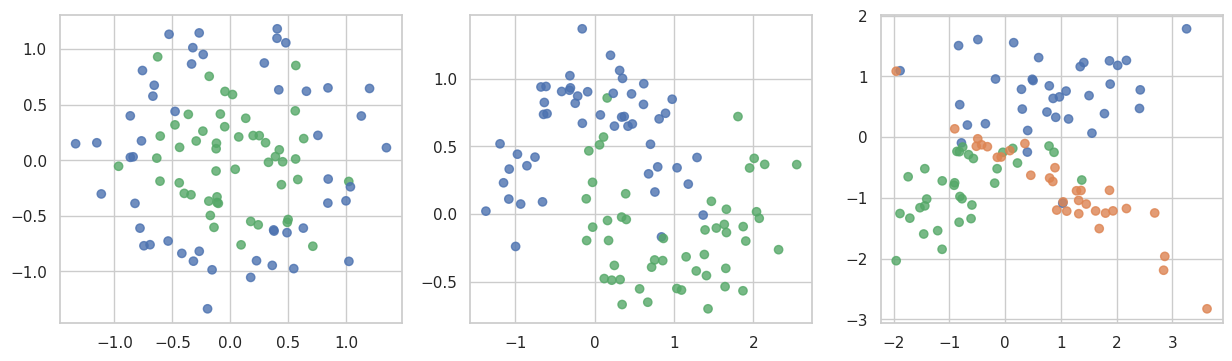

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

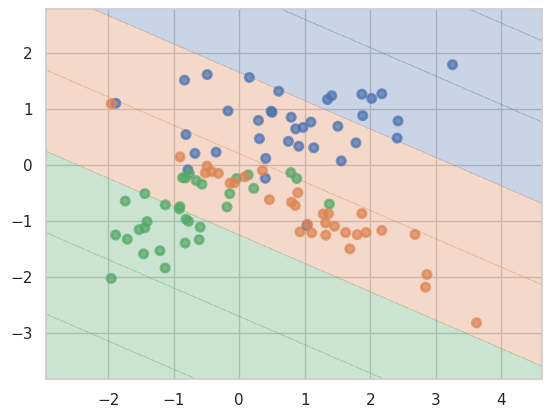

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Train Accuracy: 1.0
Test Accuracy: 0.7333333333333333
Train Accuracy: 1.0
Test Accuracy: 0.8666666666666667
Train Accuracy: 1.0
Test Accuracy: 0.8333333333333334


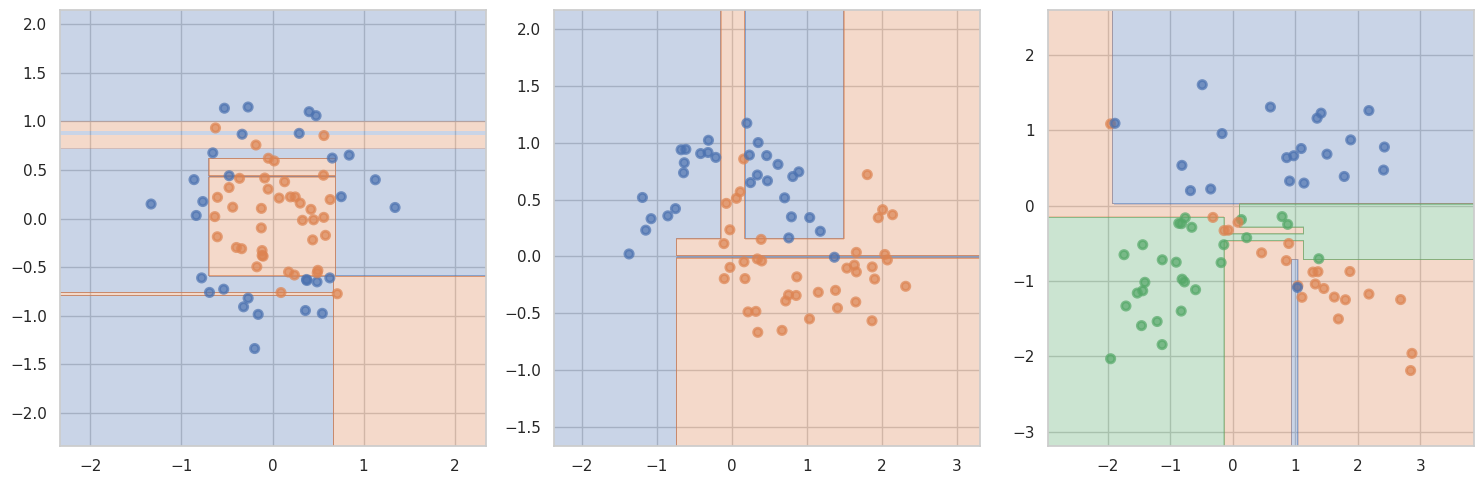

In [7]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(15, 5))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))

    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)


    plt.subplot(1, 3, i + 1)
    plot_surface(clf, X_train, y_train)

plt.tight_layout()
plt.show()

__Ответ:__ ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Деревья переобучились сильно, пытаясь подмять (охватить) каждое наблюдение под свой класс

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Max Depth: 3
Min Samples Leaf: 1
Train Accuracy: 0.8857142857142857
Test Accuracy: 0.7333333333333333


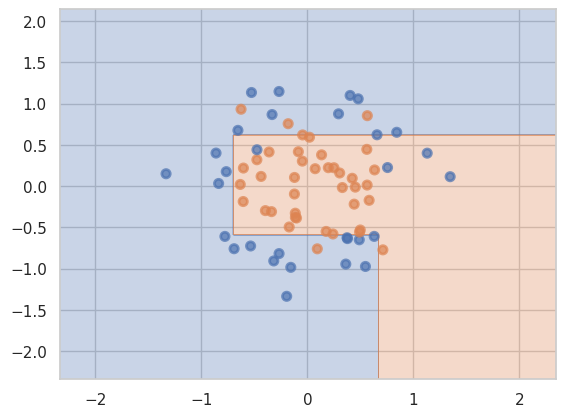

Max Depth: 3
Min Samples Leaf: 3
Train Accuracy: 0.8857142857142857
Test Accuracy: 0.7


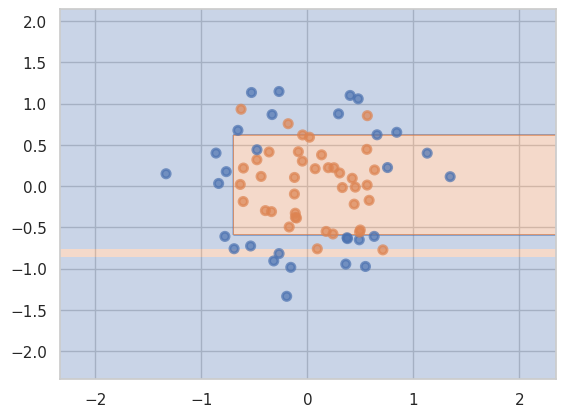

Max Depth: 3
Min Samples Leaf: 5
Train Accuracy: 0.8571428571428571
Test Accuracy: 0.8


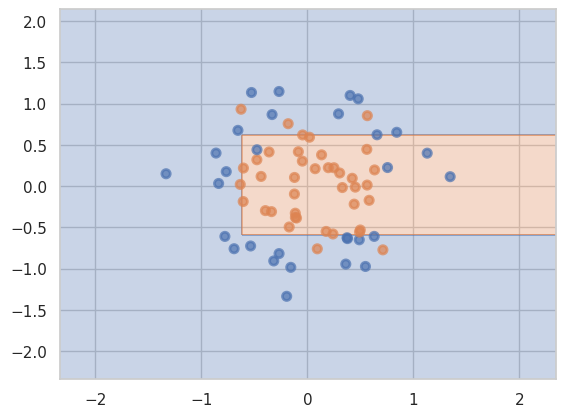

Max Depth: 5
Min Samples Leaf: 1
Train Accuracy: 0.9714285714285714
Test Accuracy: 0.7666666666666667


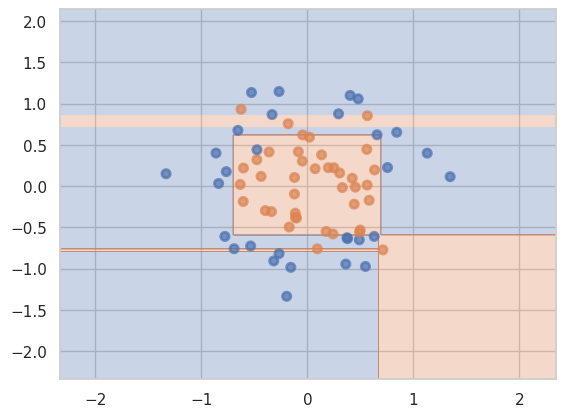

Max Depth: 5
Min Samples Leaf: 3
Train Accuracy: 0.9428571428571428
Test Accuracy: 0.7333333333333333


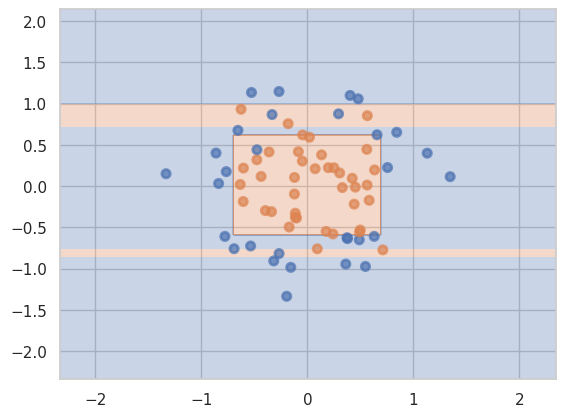

Max Depth: 5
Min Samples Leaf: 5
Train Accuracy: 0.8714285714285714
Test Accuracy: 0.9


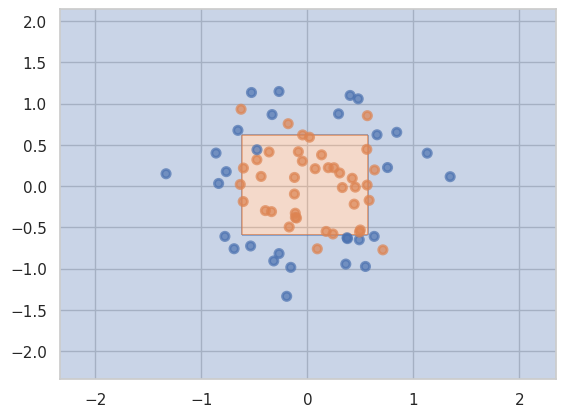

Max Depth: 7
Min Samples Leaf: 1
Train Accuracy: 1.0
Test Accuracy: 0.7333333333333333


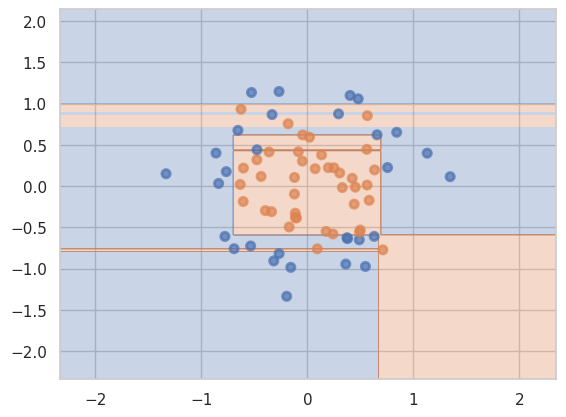

Max Depth: 7
Min Samples Leaf: 3
Train Accuracy: 0.9428571428571428
Test Accuracy: 0.7333333333333333


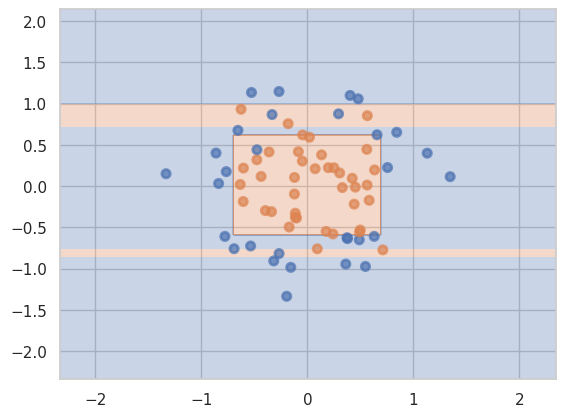

Max Depth: 7
Min Samples Leaf: 5
Train Accuracy: 0.8714285714285714
Test Accuracy: 0.9


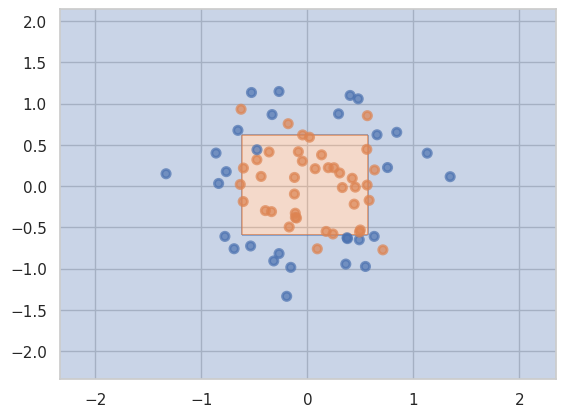

Max Depth: 3
Min Samples Leaf: 1
Train Accuracy: 0.9142857142857143
Test Accuracy: 0.9333333333333333


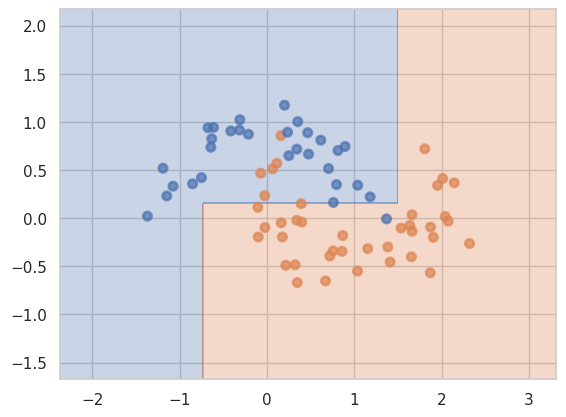

Max Depth: 3
Min Samples Leaf: 3
Train Accuracy: 0.9142857142857143
Test Accuracy: 0.8333333333333334


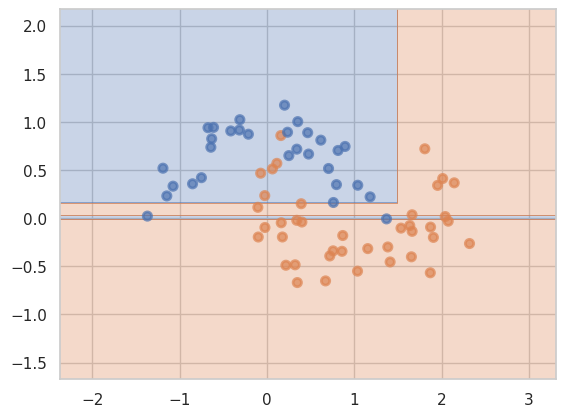

Max Depth: 3
Min Samples Leaf: 5
Train Accuracy: 0.8857142857142857
Test Accuracy: 0.8


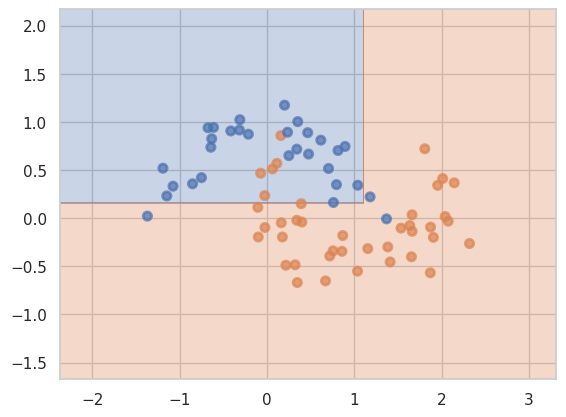

Max Depth: 5
Min Samples Leaf: 1
Train Accuracy: 1.0
Test Accuracy: 0.8666666666666667


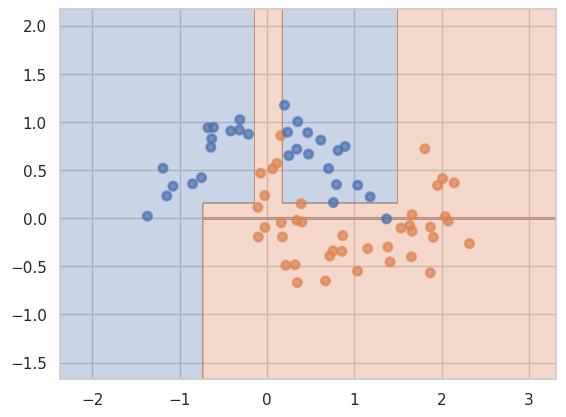

Max Depth: 5
Min Samples Leaf: 3
Train Accuracy: 0.9857142857142858
Test Accuracy: 0.7666666666666667


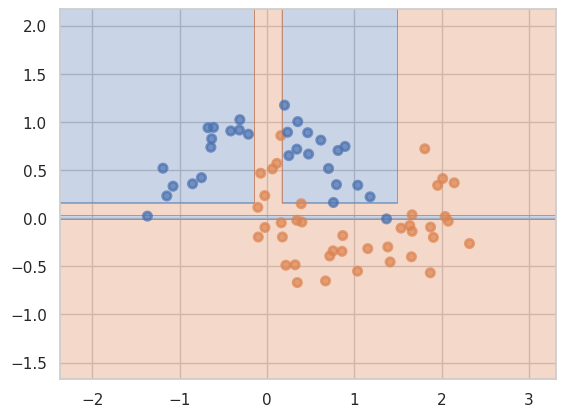

Max Depth: 5
Min Samples Leaf: 5
Train Accuracy: 0.9571428571428572
Test Accuracy: 0.7333333333333333


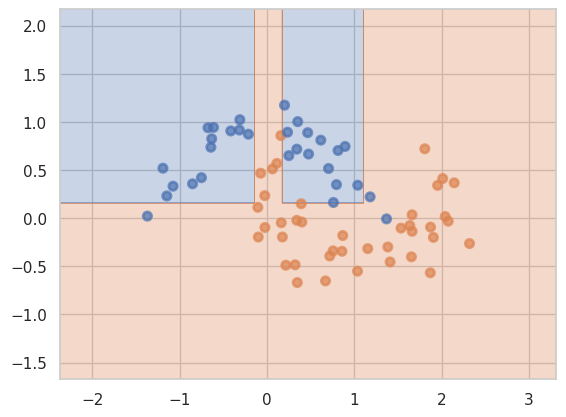

Max Depth: 7
Min Samples Leaf: 1
Train Accuracy: 1.0
Test Accuracy: 0.8666666666666667


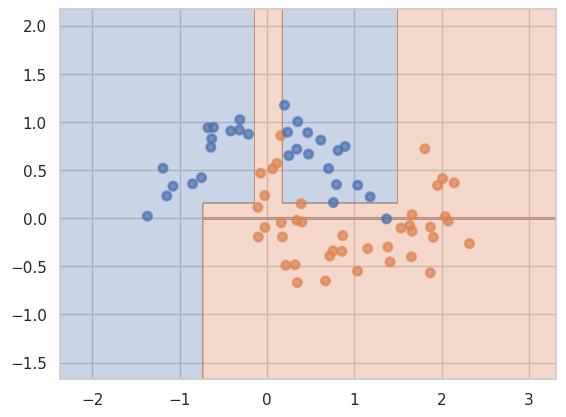

Max Depth: 7
Min Samples Leaf: 3
Train Accuracy: 0.9857142857142858
Test Accuracy: 0.7666666666666667


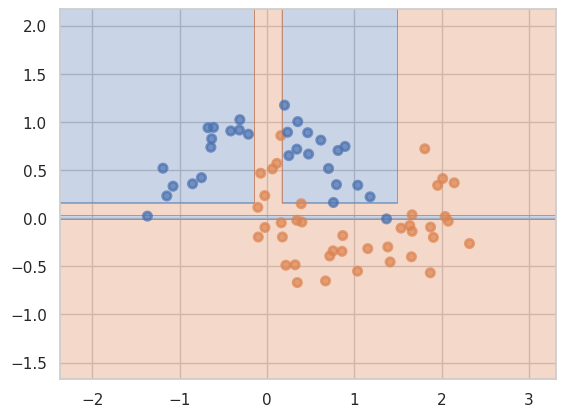

Max Depth: 7
Min Samples Leaf: 5
Train Accuracy: 0.9571428571428572
Test Accuracy: 0.7333333333333333


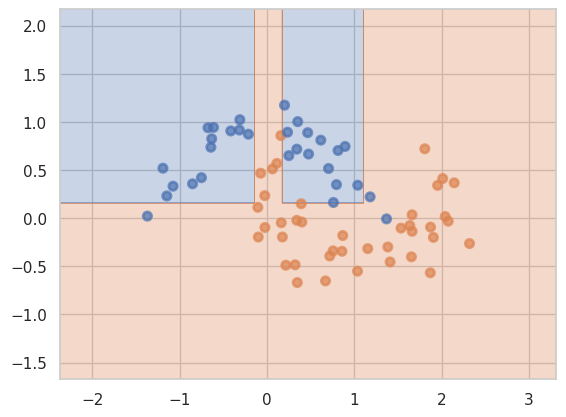

Max Depth: 3
Min Samples Leaf: 1
Train Accuracy: 0.9428571428571428
Test Accuracy: 0.8666666666666667


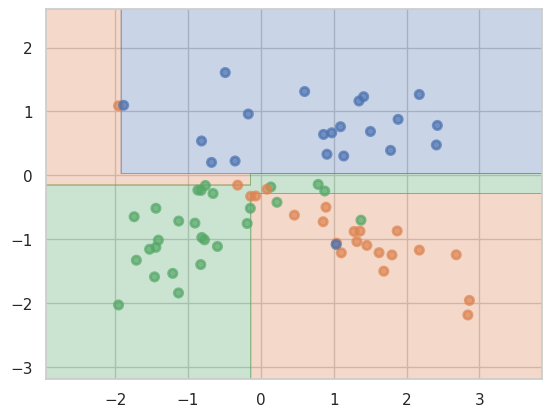

Max Depth: 3
Min Samples Leaf: 3
Train Accuracy: 0.9142857142857143
Test Accuracy: 0.7666666666666667


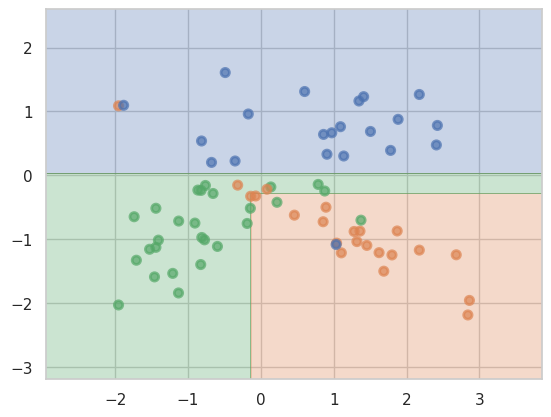

Max Depth: 3
Min Samples Leaf: 5
Train Accuracy: 0.8857142857142857
Test Accuracy: 0.7666666666666667


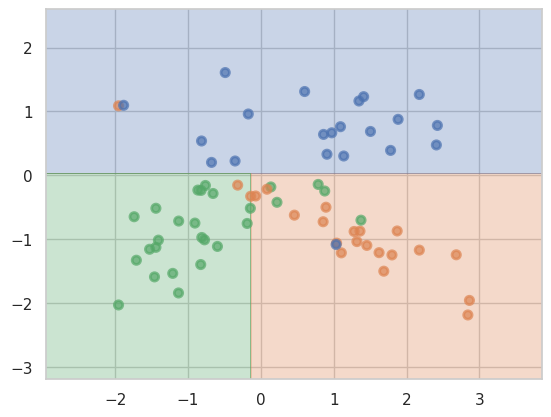

Max Depth: 5
Min Samples Leaf: 1
Train Accuracy: 0.9714285714285714
Test Accuracy: 0.8


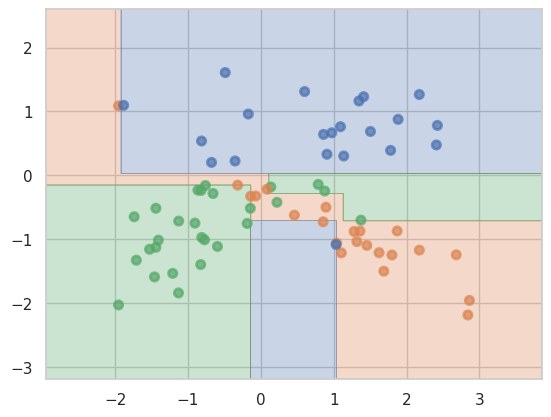

Max Depth: 5
Min Samples Leaf: 3
Train Accuracy: 0.9142857142857143
Test Accuracy: 0.7666666666666667


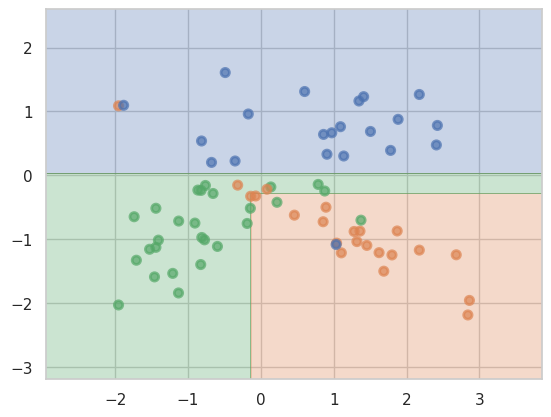

Max Depth: 5
Min Samples Leaf: 5
Train Accuracy: 0.9
Test Accuracy: 0.7


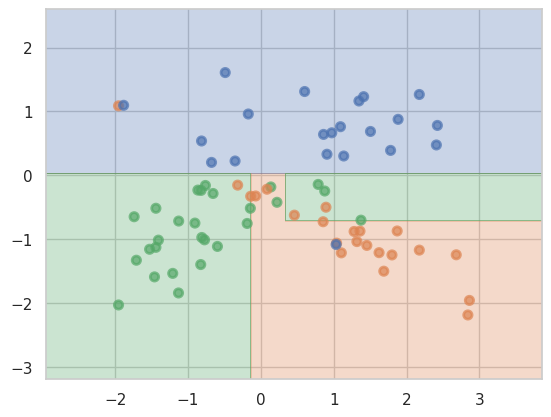

Max Depth: 7
Min Samples Leaf: 1
Train Accuracy: 1.0
Test Accuracy: 0.8333333333333334


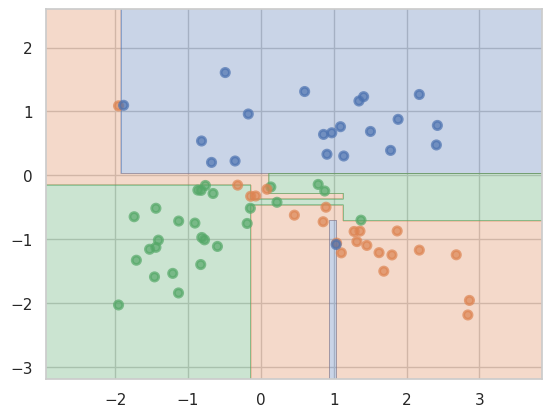

Max Depth: 7
Min Samples Leaf: 3
Train Accuracy: 0.9142857142857143
Test Accuracy: 0.7666666666666667


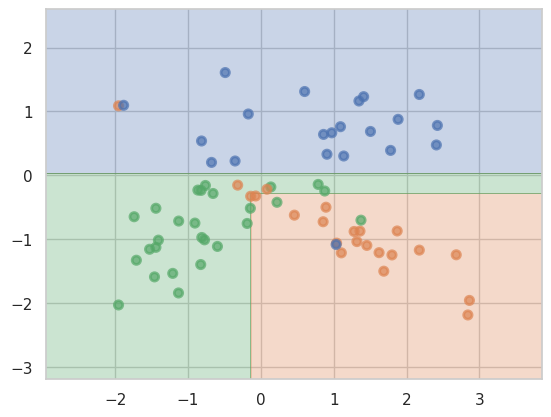

Max Depth: 7
Min Samples Leaf: 5
Train Accuracy: 0.9
Test Accuracy: 0.7


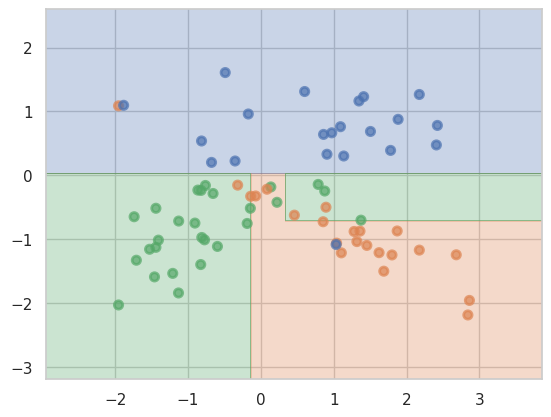

In [8]:
for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for max_depth in [3, 5, 7]:
        for min_samples_leaf in [1, 3, 5]:
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
            clf.fit(X_train, y_train)

            train_accuracy = accuracy_score(y_train, clf.predict(X_train))
            test_accuracy = accuracy_score(y_test, clf.predict(X_test))

            print("Max Depth:", max_depth)
            print("Min Samples Leaf:", min_samples_leaf)
            print("Train Accuracy:", train_accuracy)
            print("Test Accuracy:", test_accuracy)

            plt.figure()
            plot_surface(clf, X_train, y_train)
            plt.show()

__Ответ:__ ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

При увеличении max_depth модель получает возможность строить более сложные разделяющие поверхности, что может привести к переобучению. Это отражается в том, что при max_depth=7 обучающая точность стремится к 100%, но тестовая точность не всегда улучшается. При max_depth=3 модель может быть недостаточно сложной для правильного представления данных, что отражается в снижении обучающей точности.
Увеличение min_samples_leaf приводит к более простым моделям с меньшим числом листьев, что может уменьшить переобучение. Это отражается в том, что при увеличении min_samples_leaf тестовая точность иногда увеличивается или остается стабильной.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

In [39]:
def find_best_split(feature_vector, target_vector):
    sorted_indices = np.argsort(feature_vector)
    feature_vector = feature_vector[sorted_indices]
    target_vector = target_vector[sorted_indices]

    unique_values = np.unique(feature_vector)
    thresholds = (unique_values[:-1] + unique_values[1:]) / 2

    ginis = np.zeros(len(thresholds))

    total_samples = len(target_vector)
    total_pos = np.sum(target_vector)

    left_pos = np.cumsum(target_vector)[:-1]
    left_neg = np.cumsum(1 - target_vector)[:-1]

    for i, threshold in enumerate(thresholds):
        left_count = i + 1
        right_count = total_samples - left_count

        if left_count == 0 or right_count == 0:
            continue

        p_left_pos = left_pos[i] / left_count
        p_left_neg = left_neg[i] / left_count

        p_right_pos = (total_pos - left_pos[i]) / right_count
        p_right_neg = (total_samples - total_pos - left_neg[i]) / right_count

        H_left = 1 - p_left_pos**2 - p_left_neg**2
        H_right = 1 - p_right_pos**2 - p_right_neg**2

        ginis[i] = -(left_count / total_samples * H_left + right_count / total_samples * H_right)

    gini_best_idx = np.argmin(ginis)
    gini_best = ginis[gini_best_idx]
    threshold_best = thresholds[gini_best_idx]

    return thresholds, ginis, threshold_best, gini_best

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

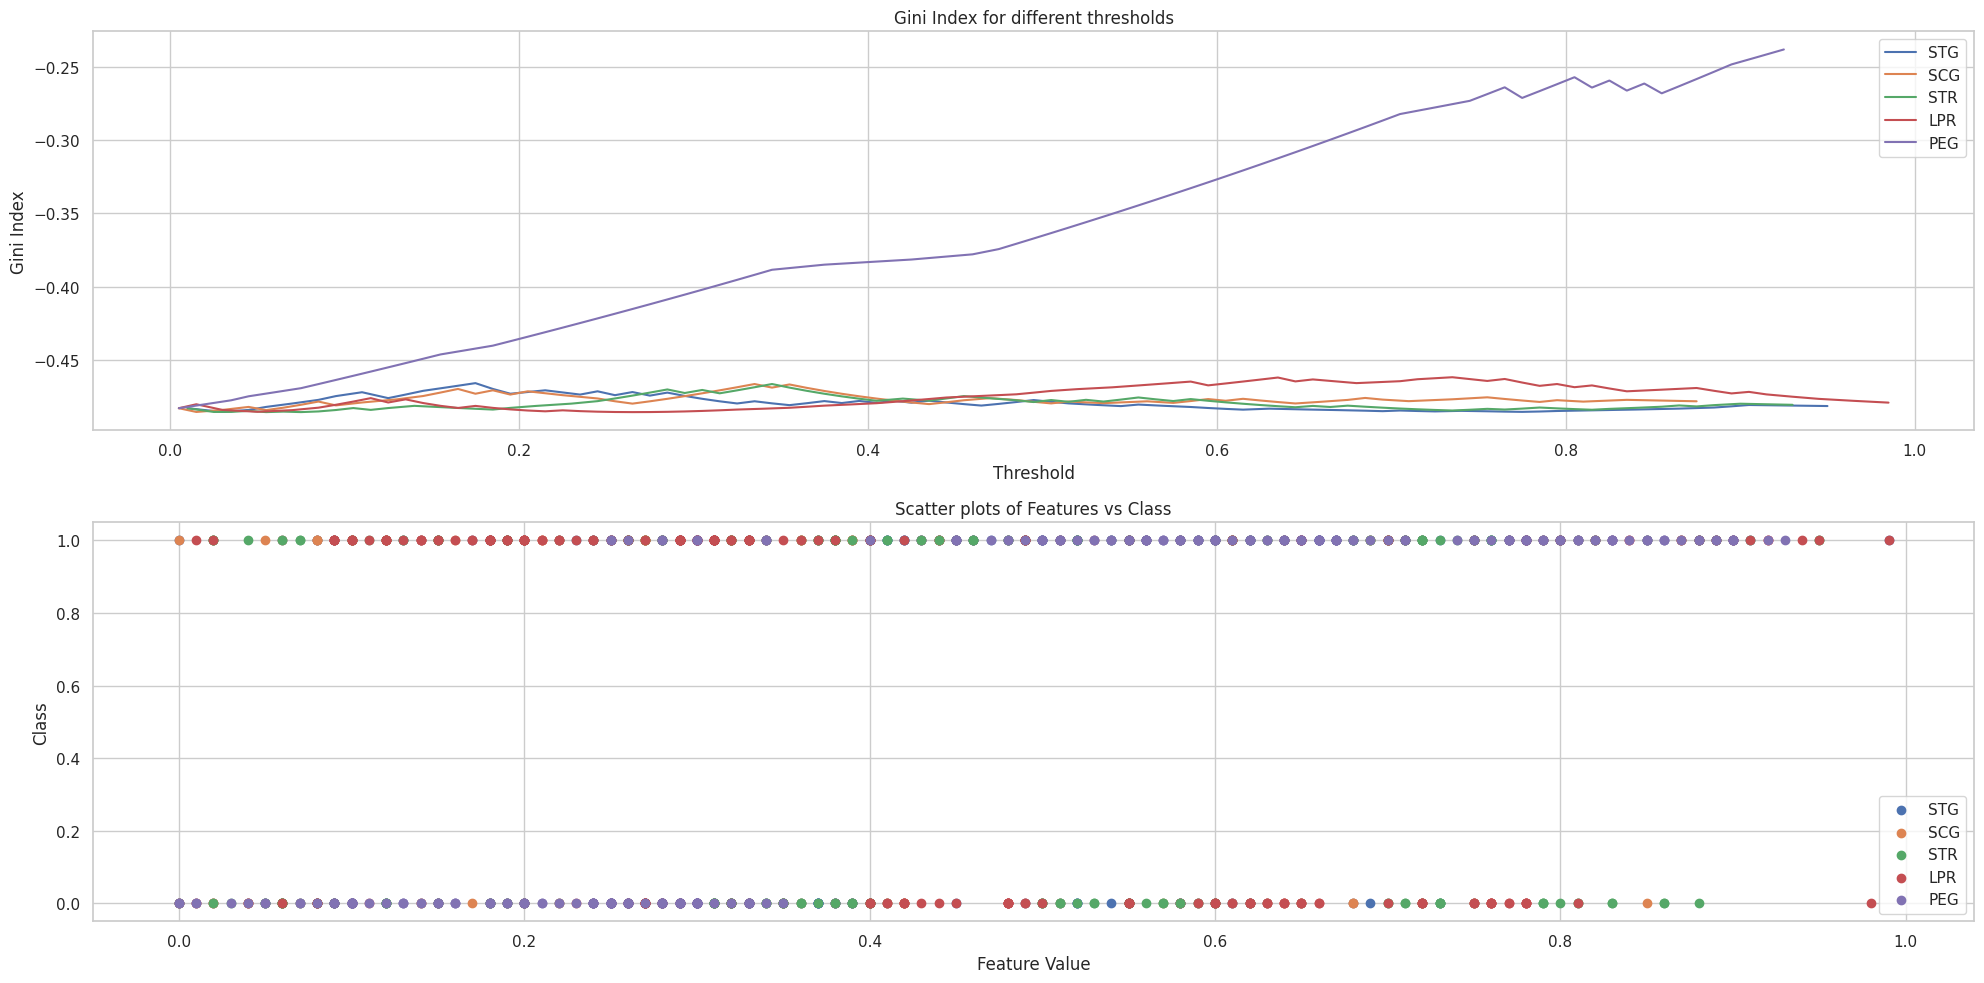

In [10]:
data = pd.read_csv('students.csv')

features = data.columns[:-1]
target = data.columns[-1]

plt.figure(figsize=(20, 10))

# Подграфик для кривых "порог — значение критерия Джини"
plt.subplot(2, 1, 1)
for feature in features:
    feature_vector = data[feature].values
    target_vector = data[target].values
    thresholds, ginis, _, _ = find_best_split(feature_vector, target_vector)
    plt.plot(thresholds, ginis, label=feature)

plt.xlabel('Threshold')
plt.ylabel('Gini Index')
plt.title('Gini Index for different thresholds')
plt.legend()

# Подграфики для scatter-графиков "значение признака — класс"
plt.subplot(2, 1, 2)
for i, feature in enumerate(features):
    plt.scatter(data[feature], data[target], label=feature)

plt.xlabel('Feature Value')
plt.ylabel('Class')
plt.title('Scatter plots of Features vs Class')
plt.legend()

plt.tight_layout()
plt.show()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

На основании кривых критерия Джини видно, что фиолетовая линия, соответствующая признаку PEG, имеет наибольшие изменения и наименьшие значения критерия Джини почти на всех интервалах порогов. Это говорит о том, что данный признак лучше всего разделяет данные на два поддерева. Таким образом, выборка стоит разделить по признаку PEG.

Визуальная оценка scatter-графиков также подтверждает это заключение. Мы видим, что значения признака PEG (фиолетовые точки) имеют более четкое разделение по классу по сравнению с другими признаками. Это согласуется с кривой критерия Джини для этого признака.

Для "хороших" признаков, по которым выборка делится почти идеально, кривая критерия Джини будет иметь наименьшие значения и будет показывать высокий контраст при разных порогах. В случае признаков, по которым разделение практически невозможно, кривая будет близка к горизонтальной линии с высокими значениями критерия Джини, показывая небольшие изменения при разных порогах.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




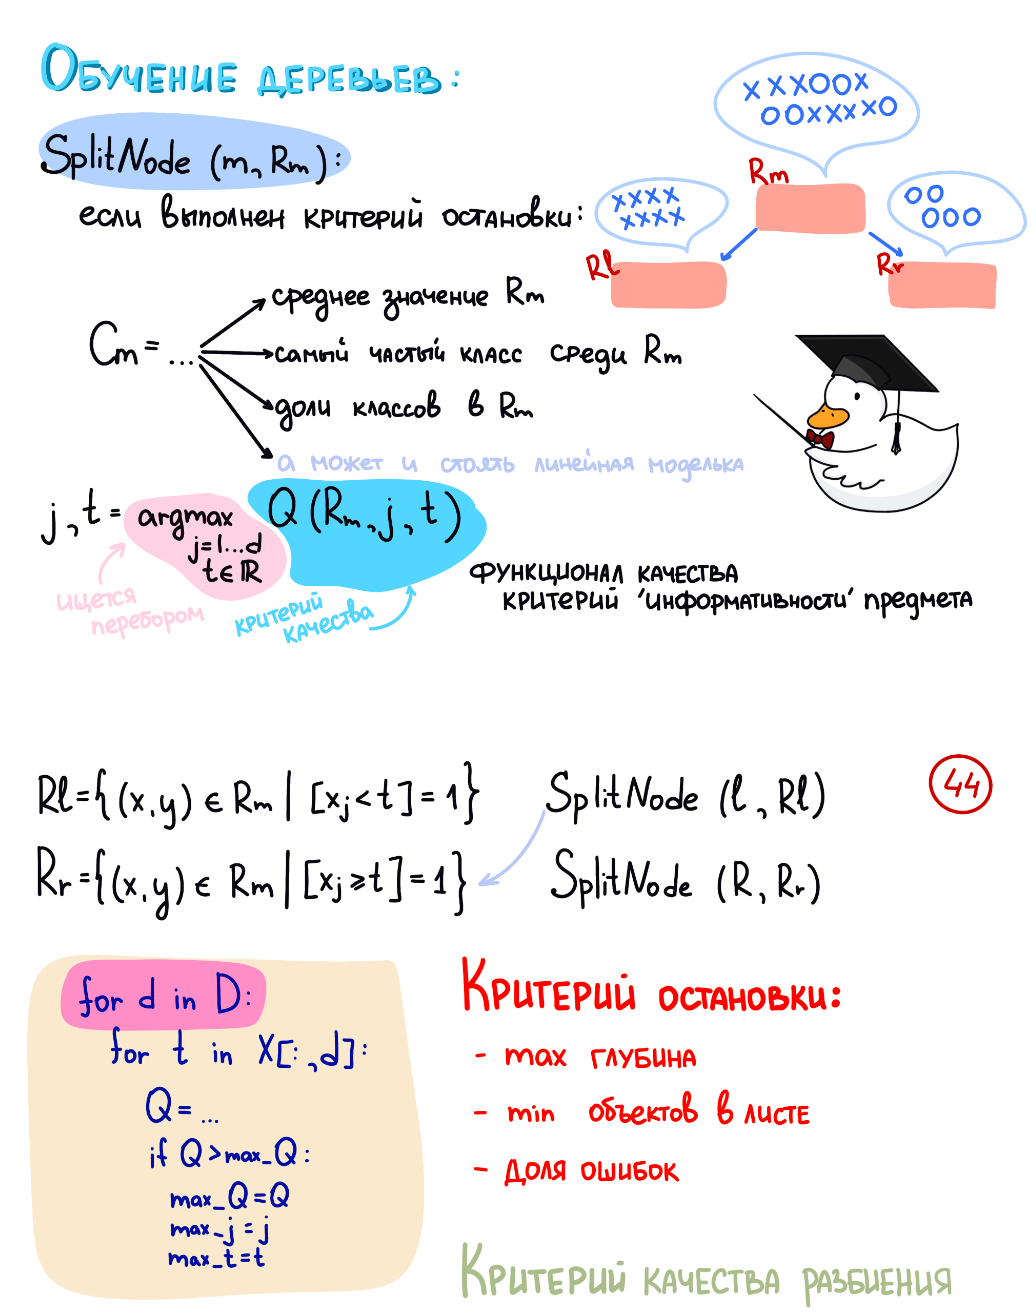

In [58]:
import numpy as np
from collections import Counter

class DecisionTree:
    def __init__(
        self,
        feature_types,
        max_depth=None,
        min_samples_split=0,
        min_samples_leaf=None,
    ):
        if any(ft not in {"real", "categorical"} for ft in feature_types):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        """
        Обучение узла дерева решений.

        Если все элементы в подвыборке принадлежат одному классу, узел становится терминальным.

        Parameters
        ----------
        sub_X : np.ndarray
            Подвыборка признаков.
        sub_y : np.ndarray
            Подвыборка меток классов.
        node : dict
            Узел дерева, который будет заполнен информацией о разбиении.

        """
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        if (self._max_depth is not None and depth >= self._max_depth) or len(sub_y) < self._min_samples_split:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None

        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {
                    key: clicks.get(key, 0) / count for key, count in counts.items()
                }
                sorted_categories = sorted(ratio, key=ratio.get)
                categories_map = {
                    category: i for i, category in enumerate(sorted_categories)
                }
                feature_vector = np.vectorize(categories_map.get)(sub_X[:, feature])
            else:
                raise ValueError("Некорректный тип признака")

            if len(np.unique(feature_vector)) <= 1:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)

            if gini_best is None or gini < gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = [
                        k for k, v in categories_map.items() if v < threshold
                    ]

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best

        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError("Некорректный тип признака")

        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"])

    def _predict_node(self, x, node):
        """
        Рекурсивное предсказание класса для одного объекта по узлу дерева решений.

        Если узел терминальный, возвращается предсказанный класс.
        Если узел не терминальный, выборка передается в соответствующее поддерево для дальнейшего предсказания.

        Parameters
        ----------
        x : np.ndarray
            Вектор признаков одного объекта.
        node : dict
            Узел дерева решений.

        Returns
        -------
        int
            Предсказанный класс объекта.
        """
        # ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
        if node["type"] == "terminal":
          return node["class"]

        feature_value = x[node["feature_split"]]

        if self._feature_types[node["feature_split"]] == "real":
            if feature_value < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

        else: # categorical case
            if feature_value in node['categories_split']:
              return self._predict_node(x,node['left_child'])
            else:
              return self._predict_node(x,node['right_child'])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

In [60]:
from sklearn.preprocessing import LabelEncoder

column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type",
    "veil-color", "ring-number", "ring-type", "spore-print-color", "population",
    "habitat"
]

data = pd.read_csv('agaricus-lepiota.data', header=None, names=column_names)

label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ["categorical"] * X.shape[1]

tree = DecisionTree(feature_types=feature_types)
tree.fit(X_train.values, y_train.values)

y_pred = tree.predict(X_test.values)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9934


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


# Как дела?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ